In [1]:
!pip install torch
!pip install torchvision

    100% |████████████████████████████████| 591.8MB 29kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x62804000 @  0x7fb85fd052a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 61kB 2.4MB/s 
    100% |████████████████████████████████| 2.0MB 14.1MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [0]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random 

import torch
import torchvision
import torchvision.transforms as transforms

from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

from scipy import io
import pandas as pd


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df_asd = pd.read_csv(r"drive/My Drive/ava/ava-human-searches_anno.csv")
df_asd.head(5)

,search-id,step-id,time,video-id,target-action
0,0,0,849.623600,Ag-pXiLrd48,clink glass
1,0,1,852.323675,Ag-pXiLrd48,clink glass
2,0,2,855.023750,Ag-pXiLrd48,clink glass
3,0,3,850.523625,Ag-pXiLrd48,clink glass
4,0,4,853.223700,Ag-pXiLrd48,clink glass


In [10]:
df_asd_4 = df_asd[(df_asd['target-action'] == "dance")]
df_asd_4.head(5)

,search-id,step-id,time,video-id,target-action
10594,27,0,58.500390,r2llOyS-BmE,dance
10595,27,1,56.700378,r2llOyS-BmE,dance
10596,27,2,51.300342,r2llOyS-BmE,dance
10597,27,3,45.000300,r2llOyS-BmE,dance
10598,27,4,31.500210,r2llOyS-BmE,dance


In [11]:
videos_unique = df_asd_4['video-id'].unique()
videos_unique

array(['r2llOyS-BmE', 'HJzgJ9ZjvJk', '9F2voT6QWvQ', 'tghXjom3120',
       '_mAfwH6i90E', 'XV_FF3WC7kA', 'AYebXQ8eUkM', 'J1jDc2rTJlg',
       '5BDj0ow5hnA', 'T-Fc9ctuNVI', 'KWoSGtglCms', '#NAME?',
       'VsYPP2I0aUQ', 'qx2vAO5ofmo', 'sUVhd0YTKgw', 'Ma2hgTmveKQ',
       'F3dPH6Xqf5M', 'UIy730JrFIc', 'xO4ABy2iOQA', 'Db19rWN5BGo',
       'uNT6HrrnqPU', 'Ov0za6Xb1LM', 'xmqSaQPzL1E', 'HymKCzQJbB8',
       'hbYvDvJrpNk', 'o4xQ-BEa3Ss', 'N7baJsMszJ0', 'u1ltv6r14KQ',
       'Kb1fduj-jdY', 'b5pRYl_djbs', 'CZ2NP8UsPuE', 'cKA-qeZuH_w',
       'l-jxh8gpxuY', 'VMNmRlhFT-o', '5YPjcdLbs5g', 'fpprSy6AzKk',
       'oq_bufAhyl8', 'plkJ45_-pMk', 'B1MAUxpKaV8', 'S0tkhGJjwLA',
       '8aMv-ZGD4ic'], dtype=object)

In [12]:
df_dummy = pd.read_csv(r"drive/My Drive/ava/ava_working_train_ids.csv", names = ['ids'], index_col = False)
working_video_ids = df_dummy['ids'].unique()
working_video_ids

array(['55Ihr6uVIDA', 'HymKCzQJbB8', 'K_SpqDJnlps', '32HR3MnDZ8g',
       'KVq6If6ozMY', 'AN07xQokfiE', 'y7ncweROe9U', 'N5UD8FGzDek',
       'xp67EC-Hvwk', 'UgZFdrNT6W0', 'rFgb2ECMcrY', 'fNcxxBjEOgw',
       '-FaXLcSFjUI', 'CZ2NP8UsPuE', 'sADELCyj10I', 'yMtGmGa8KZ0',
       'O_NYCUhZ9zw', 'XV_FF3WC7kA', 'lWXhqIAvarw', 'oD_wxyTHJ2I',
       'bhlFavrh7WU', 'BY3sZmvUp-0', 'qx2vAO5ofmo', 'Ekwy7wzLfjc',
       'fD6VkIRlIRI', 'Ag-pXiLrd48', 'hHgg9WI8dTk', 't1LXrJOvPDg',
       'Riu4ZKk4YdQ', '5BDj0ow5hnA', 'Ksd1JQFHYWA', 'skiZueh4lfY',
       'T-Fc9ctuNVI', 'Ma2hgTmveKQ', 'uwW0ejeosmk', 'rUYsoIIE37A',
       'AYebXQ8eUkM', 'Db19rWN5BGo', 'E7JcKooKVsM', '914yZXz-iRs',
       'KWoSGtglCms', '9bK05eBt1GM', 'Kb1fduj-jdY', 'tt0t_a1EDCE',
       'oq_bufAhyl8', '6d5u6FHvz7Q', '_a9SWtcaNj8', 'vfjywN5CN0Y',
       'rk8Xm0EAOWs', 'l2XO3tQk8lI', 'uzPI7FcF79U', 'N1K2bEZLL_A',
       'B1MAUxpKaV8', '9F2voT6QWvQ', '_mAfwH6i90E', 'fpprSy6AzKk',
       'G5Yr20A5z_Q', 'l-jxh8gpxuY', 'gjdgj04FzR0', 'o4xQ-BEa3

In [13]:
df_asd_4_working_only = df_asd_4[(df_asd_4['video-id'].isin(working_video_ids))]
videos_4 = df_asd_4_working_only['video-id'].unique()
df = df_asd_4_working_only
videos_4

array(['9F2voT6QWvQ', 'tghXjom3120', '_mAfwH6i90E', 'XV_FF3WC7kA',
       'AYebXQ8eUkM', 'J1jDc2rTJlg', '5BDj0ow5hnA', 'T-Fc9ctuNVI',
       'KWoSGtglCms', 'VsYPP2I0aUQ', 'qx2vAO5ofmo', 'sUVhd0YTKgw',
       'Ma2hgTmveKQ', 'F3dPH6Xqf5M', 'xO4ABy2iOQA', 'Db19rWN5BGo',
       'xmqSaQPzL1E', 'HymKCzQJbB8', 'o4xQ-BEa3Ss', 'u1ltv6r14KQ',
       'Kb1fduj-jdY', 'b5pRYl_djbs', 'CZ2NP8UsPuE', 'cKA-qeZuH_w',
       'l-jxh8gpxuY', '5YPjcdLbs5g', 'fpprSy6AzKk', 'oq_bufAhyl8',
       'plkJ45_-pMk', 'B1MAUxpKaV8', 'S0tkhGJjwLA', '8aMv-ZGD4ic'],
      dtype=object)

In [14]:
unique_sequences = df['search-id'].unique()
unique_sequences

array([  40,   41,   42,   43,   44,   45,   46,   47,   48,   50,   52,
         53,   54,   56,   57,   58,   59,   60,   61,   62,   63,   66,
         67,   70,   71,   73,   75,   77,   78,   79,   80,   81,   84,
         88,   92,   93,   97,  100,  101,  102,  103,  104,  105,  106,
        109,  112,  114,  115,  116,  119,  120,  121,  123,  124,  126,
        127,  128,  131,  133,  134,  136,  137,  139,  140,  141,  142,
        143,  144,  145,  146,  147,  149,  151,  152,  154,  155,  156,
        157,  159,  161,  162,  163,  164,  166,  167,  168,  169,  170,
        171,  172,  174,  176,  177,  178,  179,  180,  183,  184,  186,
        187,  188,  190,  192,  193,  195,  196,  197,  200,  202,  203,
        204,  207,  208,  210,  211,  212,  214,  215,  216,  219,  220,
        222,  223,  224,  230,  232,  233,  234,  236,  240,  241,  244,
        245,  246,  248,  249,  251,  254,  255,  256,  258,  260,  261,
        262,  265,  266,  267,  268,  272,  273,  2

In [18]:
input_l = []
output_l = []

video_dict = {}

for video in df['video-id'].unique() :
  print(video)
  video_dict[video] = []
  df_curr = df[(df['video-id'] == video)]
  seqs = df_curr['search-id'].unique()

  for seq in seqs :
    X = []
    y = []
#     print(seq)
    timestamps = df_curr[(df_curr['search-id'] == seq)]['time'].as_matrix()
    len_t = len(timestamps)
    for i in range(1, len_t, 1) :
      X.append(timestamps[i-1])
      y.append(timestamps[i] - timestamps[i-1] / 10)
  
    video_dict[video].append([X, y])


9F2voT6QWvQ
tghXjom3120
_mAfwH6i90E
XV_FF3WC7kA
AYebXQ8eUkM
J1jDc2rTJlg
5BDj0ow5hnA
T-Fc9ctuNVI
KWoSGtglCms
VsYPP2I0aUQ
qx2vAO5ofmo
sUVhd0YTKgw
Ma2hgTmveKQ
F3dPH6Xqf5M
xO4ABy2iOQA
Db19rWN5BGo
xmqSaQPzL1E
HymKCzQJbB8
o4xQ-BEa3Ss
u1ltv6r14KQ
Kb1fduj-jdY
b5pRYl_djbs
CZ2NP8UsPuE
cKA-qeZuH_w
l-jxh8gpxuY
5YPjcdLbs5g
fpprSy6AzKk
oq_bufAhyl8
plkJ45_-pMk
B1MAUxpKaV8
S0tkhGJjwLA
8aMv-ZGD4ic


In [16]:
import torchvision.models as models
resnet50 = models.resnet50(pretrained=True)
resnet50.avgpool = torch.nn.AdaptiveAvgPool2d(1)
visual_encoder = nn.Sequential(*list(resnet50.children())[:-1])
visual_encoder.cuda()
visual_encoder.eval()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:02<00:00, 50727836.49it/s]


Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1

In [0]:
MIN = 904 
MAX = 1798

In [19]:

import cv2

lstm = nn.LSTM(256, 1000, num_layers = 1)
linear = nn.Linear(1000, 1)
hidden = (torch.randn(1, 1, 1000).cuda(),
          torch.randn(1, 1, 1000).cuda())

lstm_model = nn.Sequential(lstm, linear)
lstm_model.cuda()
lstm_model.train()
criterion = torch.nn.SmoothL1Loss().type(torch.cuda.FloatTensor)

optimizer = torch.optim.Adam(lstm_model.parameters(), lr=1e-3)

for video in list(*[video_dict]) :
  print(video)
  cap = cv2.VideoCapture("drive/My Drive/ava/videos/" + str(video) + ".mp4")
  sequences = video_dict[video]
  for ttt, seq in enumerate(sequences) :
    print('New seq')
    [X, y] = seq
#     previous = X[i]
    sc = 0
    for x_i,y_i in zip(X,y) :
      sc = sc + 1
      lstm_model.zero_grad()
 
      cap.set(cv2.CAP_PROP_POS_MSEC, (904 + x_i) * 1000)
      ret, frame = cap.read()
#       frame = train_transforms(frame)
#       cv2.imshow("frame", frame)
      img = np.rollaxis(frame, 2, 0)   
#       cv2.imshow("frame", cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY))
#       cv2.waitKey()
      
      t = torch.from_numpy(img)
      x_var = Variable(t.unsqueeze(0).float().cuda())
#       print(x_var.shape)
      
      output = visual_encoder(x_var).data.cpu().numpy() 
#       print(output.shape)
      op = output.reshape(-1, 16)
#       print(op.shape)

      mean, eigvec = cv2.PCACompute(op, mean=None, maxComponents = 64)
#       print(eigvec.shape)

      op = eigvec.reshape(1, 1, -1)
      t2 = torch.from_numpy(op)
      x_var2 = Variable(t2.float().cuda())

#       print(x_i)
      out_lstm, hidden = lstm_model[0](x_var2, hidden)
      preds = lstm_model[1](out_lstm)
#       print(out_lstm.shape)
    
      loss = criterion(y_i, preds)
      if (ttt % 1000 == 0) :
        print("true : %f , pred : %f  loss : %f" % (y_i, preds, loss))
#       print("loss : %f" % loss)

      optimizer.zero_grad()
      loss.backward(retain_graph=True)
      optimizer.step()
      if (sc > 250) :
        print('break')
        break
      
    out_lstm.detach_()
    hidden = (torch.randn(1, 1, 1000).cuda(), torch.randn(1, 1, 1000).cuda())

      
#       y_i
        
      

9F2voT6QWvQ
New seq
true : 137.523686 , pred : -0.099404  loss : 137.123093
true : 135.003619 , pred : 0.176734  loss : 134.326889
true : 133.473578 , pred : 0.603737  loss : 132.369843
true : 130.953510 , pred : 0.969137  loss : 129.484375
true : 126.723397 , pred : 1.243384  loss : 124.980011
true : 124.473337 , pred : 1.496334  loss : 122.476997
true : 119.343199 , pred : 2.105187  loss : 116.738014
true : 114.483069 , pred : 2.652223  loss : 111.330849
true : 109.622938 , pred : 3.911983  loss : 105.210960
true : 103.862784 , pred : 5.399991  loss : 97.962791
true : 98.192632 , pred : 6.729557  loss : 90.963081
true : 91.622456 , pred : 7.661596  loss : 83.460861
true : 83.342234 , pred : 7.964629  loss : 74.877602
true : 77.042065 , pred : 8.079584  loss : 68.462486
true : 71.461916 , pred : 8.371592  loss : 62.590324
true : 65.791764 , pred : 8.863970  loss : 56.427795
true : 59.221587 , pred : 9.569733  loss : 49.151855
true : 54.541462 , pred : 10.370321  loss : 43.671143
true 

KeyboardInterrupt: ignored

In [20]:
lstm_model


Sequential(
  (0): LSTM(256, 1000)
  (1): Linear(in_features=1000, out_features=1, bias=True)
)

In [0]:
torch.save(lstm_model, 'drive/My Drive/lstm_model_f.h5')

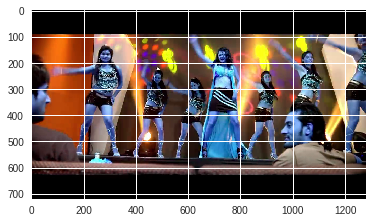

In [0]:
cap = cv2.VideoCapture("drive/My Drive/ava/videos/9F2voT6QWvQ.mp4")
cap.set(cv2.CAP_PROP_POS_MSEC, (904 + 144.9038841) * 1000)
ret, frame = cap.read()


%matplotlib inline
from matplotlib import pyplot as plt
plt.imshow(frame)
plt.show()